<a href="https://colab.research.google.com/github/nishanth0233/INFO-5502/blob/main/lab_assignment_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The seventh Lab-assignment (03/31/2022, 50 points in total)

The purpose of this exercise is to build several regression models based on real-world datasets. 

### Question 1 (25 points) Build a regession model to predict the change in price of the stock overtime. It can either be linear regression or non-linear regression. You can download the dataset from here: https://github.com/unt-iialab/info5502-spring2022/blob/main/datasets/portfolio_data.csv. The implementation of the LSTM on this same dataset was posted here as an reference: https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm/notebook

In [ ]:
### You code here

#importing libraries
%matplotlib inline
import pandas as pd
import pandas_datareader as pdread
import numpy as np
import matplotlib.pyplot as pplt
import seaborn as sns
import datetime as dt
from sklearn.linear_model import LinearRegression



In [8]:
# defining the source of date
url = 'https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/datasets/portfolio_data.csv'
#reading the data frame as portfolio
Portfolio = pd.read_csv(url)
#checking the data sample
Portfolio.head(10)



,Date,AMZN,DPZ,BTC,NFLX
0,5/1/2013,248.229996,51.190983,106.250000,30.415714
1,5/2/2013,252.550003,51.987320,98.099998,30.641428
2,5/3/2013,258.049988,52.446388,112.900002,30.492857
3,5/6/2013,255.720001,53.205257,109.599998,30.098572
4,5/7/2013,257.730011,54.151505,113.199997,29.464285
5,5/8/2013,258.679993,54.385727,112.800003,29.801428
6,5/9/2013,260.160004,54.020340,117.699997,30.915714
7,5/10/2013,263.630005,54.357620,115.639999,31.098572
8,5/13/2013,264.510010,54.573097,111.400002,32.768570
9,5/14/2013,268.329987,55.275757,114.220001,33.424286


We can observe here we have four company stock details date wise. Amazon, DPZ, Bitcoin and Netflix. We will use one of these companies to visualize the prediction model.

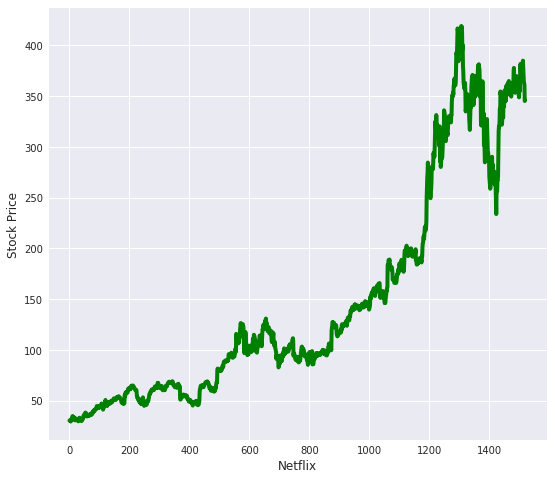

In [18]:
#Defining the Netflix data out of Portfolio
Netflix = Portfolio[['NFLX']]
#Plotting the given Netflix data
Netflix.NFLX.plot(figsize=(8,8),color='Green',linestyle='solid') 
plt.ylabel("Stock Price")
plt.xlabel("Netflix")
plt.show()


In [19]:
#null values check
Portfolio.isnull().sum()

Date    0
AMZN    0
DPZ     0
BTC     0
NFLX    0
dtype: int64

We can observe that there are no null values

In [20]:
#performing regression to predict the stock value of Netflix

type(Portfolio['NFLX'])

pandas.core.series.Series

In [26]:
# except NFLX we will relate the remaining data
# a will be the data except Netflix
a = Portfolio.iloc[:,[0,1,2,3]]
a


,Date,AMZN,DPZ,BTC
0,5/1/2013,248.229996,51.190983,106.250000
1,5/2/2013,252.550003,51.987320,98.099998
2,5/3/2013,258.049988,52.446388,112.900002
3,5/6/2013,255.720001,53.205257,109.599998
4,5/7/2013,257.730011,54.151505,113.199997
...,...,...,...,...
1515,5/8/2019,1917.770020,283.149994,6171.959961
1516,5/9/2019,1899.869995,282.160004,6358.290039
1517,5/10/2019,1889.979980,278.369995,7191.359863
1518,5/13/2019,1822.680054,273.880005,7980.129883


In [28]:
# b will be the data of Netflix
b = Portfolio.iloc[:,[4]]
b


,NFLX
0,30.415714
1,30.641428
2,30.492857
3,30.098572
4,29.464285
...,...
1515,364.369995
1516,362.750000
1517,361.040009
1518,345.260010


### Question 2 (25 points) The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets. Formally, given a training sample of tweets and labels, where label '1' denotes the tweet is racist/sexist and label '0' denotes the tweet is not racist/sexist, your objective is to predict the labels on the test dataset. The dataset can be downloaded here: https://github.com/unt-iialab/info5502-spring2022/tree/main/datasets/Twitter%20Sentiment%20Analysis. Please build a logistic regression model for the classification, evaluation metrics include accuracy, precision, recall, and F-1 score need to be reported. 

In [ ]:
### You code here:





